In [1]:
library(LiblineaR)
library(pROC)
library(useful)
library(caret)
library(ROCR)
library(clue)

Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Loading required package: ggplot2
Loading required package: lattice
Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [3]:
#readdata, get train,test data
alldata= read.csv("transfusion.data")
colnames(alldata) <-c("R","F","M","T","Class")
ones=which(alldata$Class==1)
zeros=which(alldata$Class==0)

classone<-alldata[ones,]
classzero<-alldata[zeros,]
rownames(classone) <- seq(length=nrow(classone))
rownames(classzero) <- seq(length=nrow(classzero))

zeroind=ceiling(1/5*nrow(classzero))
oneind=ceiling(1/5*nrow(classone))

test = rbind(classzero[1:zeroind,],classone[1:oneind,])
train=rbind(classzero[(zeroind+1):nrow(classzero),],classone[(oneind+1):nrow(classone),])

cat(dim(classzero),dim(classone),dim(train),dim(test), dim(alldata))

rownames(train) <- seq(length=nrow(train))
rownames(test) <- seq(length=nrow(test))

570 5 178 5 598 5 150 5 748 5

In [4]:
#supervised learning
strain<-scale(train[1:4],center = TRUE, scale = TRUE)
trainnorm=cbind(strain,train$Class)
stest<-scale(test[1:4],center = TRUE, scale = TRUE)
testnorm=cbind(stest,test$Class)
colnames(trainnorm) <-c("R","F","M","T","Class")
colnames(testnorm)<-c("R","F","M","T","Class")
trainnorm=as.data.frame(trainnorm)
testnorm=as.data.frame(testnorm)
# trainnorm$Class=as.factor(trainnorm$Class)
# testnorm$Class=as.factor(testnorm$Class)


In [5]:
tryCosts= c(1000,100,10,1,0.1,0.01,0.001)
bestCo= NA
bestAcc= 0

for(co in tryCosts){
acc=LiblineaR(data=trainnorm[,1:4],target=factor(trainnorm$Class),type=5,cost=co,bias=1,cross=5,verbose=FALSE)
# cat("Results for C=",co," : ",1-acc," error.\n",sep="")
if(acc>bestAcc){
bestCost=co
bestAcc=acc
}
    }
model =LiblineaR(data=trainnorm[,1:4],target=factor(trainnorm$Class),type=5,cost=bestCost,bias=1,verbose=FALSE)


# Display confusion matrix
# res=table(p$predictions,testnorm$Class)
# c=confusionMatrix(p$predictions,testnorm$Class)


In [6]:
# roccurve <- roc(testnorm$Class ~ptrain$predictions)

ptrain=predict(model, newx=trainnorm[,1:4],decisionValues=TRUE)
ptest=predict(model,newx=testnorm[,1:4],decisionValues=TRUE)
# pd <- prediction(ptrain,as.numeric(trainnorm$Class)) 

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 449 126
         1   7  16
                                          
               Accuracy : 0.7776          
                 95% CI : (0.7421, 0.8103)
    No Information Rate : 0.7625          
    P-Value [Acc > NIR] : 0.2078          
                                          
                  Kappa : 0.1368          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9846          
            Specificity : 0.1127          
         Pos Pred Value : 0.7809          
         Neg Pred Value : 0.6957          
             Prevalence : 0.7625          
         Detection Rate : 0.7508          
   Detection Prevalence : 0.9615          
      Balanced Accuracy : 0.5487          
                                          
       'Positive' Class : 0               
                                          

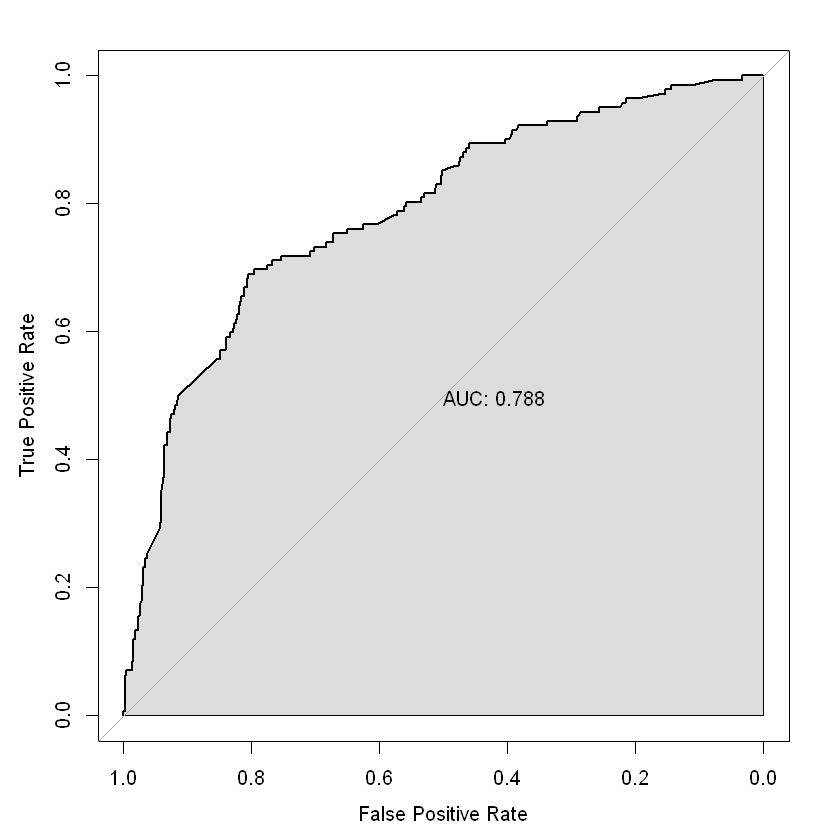

In [7]:
confusionMatrix(ptrain$predictions,trainnorm$Class)
roccurve<-roc(trainnorm$Class~ptrain$decisionValues[,1])
# plot(roccurve,xlab="False Positive Rate",ylab="True Positive Rate")
plot(roccurve,xlab="False Positive Rate",ylab="True Positive Rate",auc.polygon = TRUE,print.auc=TRUE)

# legend(0.9,toString(auc(roccurve)),lwd=3)


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 114  34
         1   0   2
                                          
               Accuracy : 0.7733          
                 95% CI : (0.6979, 0.8376)
    No Information Rate : 0.76            
    P-Value [Acc > NIR] : 0.3931          
                                          
                  Kappa : 0.0821          
 Mcnemar's Test P-Value : 1.519e-08       
                                          
            Sensitivity : 1.00000         
            Specificity : 0.05556         
         Pos Pred Value : 0.77027         
         Neg Pred Value : 1.00000         
             Prevalence : 0.76000         
         Detection Rate : 0.76000         
   Detection Prevalence : 0.98667         
      Balanced Accuracy : 0.52778         
                                          
       'Positive' Class : 0               
                                          

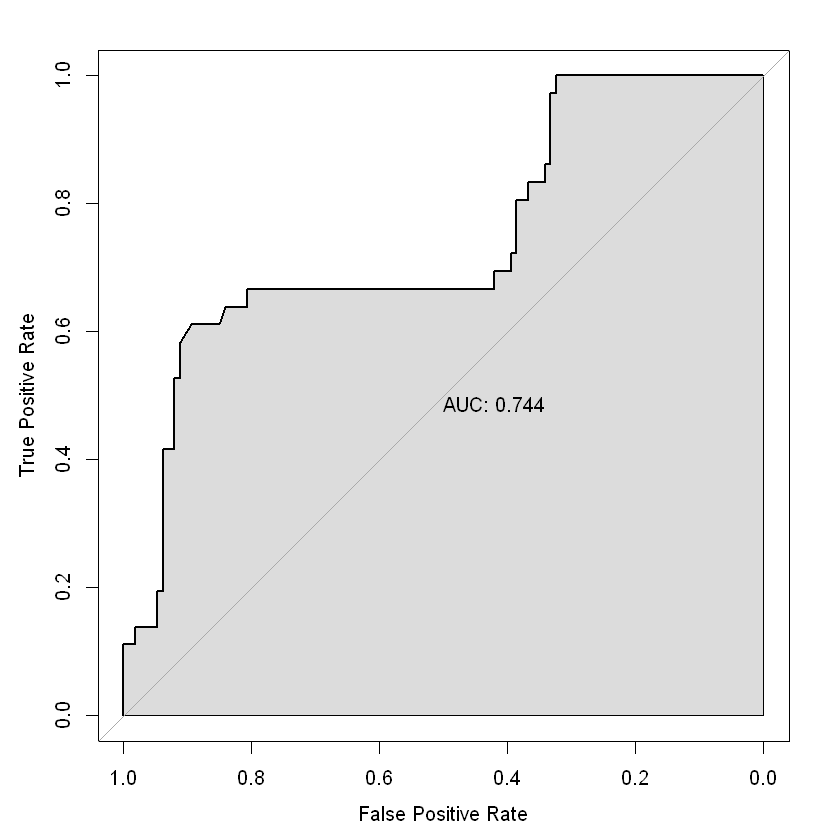

In [638]:
confusionMatrix(ptest$predictions,testnorm$Class)
roccurve<-roc(testnorm$Class~ptest$decisionValues[,1])
plot(roccurve,colorize=TRUE,xlab="False Positive Rate",ylab="True Positive Rate",auc.polygon = TRUE,print.auc=TRUE)

# pd <- prediction(ptrain$decisionValues[,1],trainnorm$Class) 
# per <- performance(pd,"tpr","fpr")
# plot(per, lty=3, col="red",colorize=TRUE)

# data(ROCR.hiv)
# attach(ROCR.hiv)
# pred.svm <- prediction(hiv.svm$predictions, hiv.svm$labels)
# perf.svm <- performance(pred.svm, 'tpr', 'fpr') 
# pred.nn <- prediction(hiv.nn$predictions, hiv.svm$labels) 
# perf.nn <- performance(pred.nn, 'tpr', 'fpr')
# plot(perf.svm, lty=3, col="red",main="SVMs and NNs for prediction of HIV-1 coreceptor usage")
# plot(perf.nn, lty=3, col="blue",add=TRUE) 
# plot(perf.svm, avg="vertical", lwd=3, col="red", spread.estimate="stderror",plotCI.lwd=2,add=TRUE) 
# plot(perf.nn, avg="vertical", lwd=3, col="blue", spread.estimate="stderror",plotCI.lwd=2,add=TRUE) 
# legend(0.6,0.6,c('SVM','NN'),col=c('red','blue'),lwd=3)




In [10]:
#1_bii
alldata= read.csv("transfusion.data")

colnames(alldata) <-c("R","F","M","T","Class")

salldata<-scale(alldata[,1:4],center=TRUE,scale=TRUE)
alldatanorm=cbind(salldata,alldata$Class)
colnames(alldatanorm) <-c("R","F","M","T","Class")
alldatanorm=as.data.frame(alldatanorm)
alldatanorm$Class=as.factor(alldatanorm$Class)
ones=which(alldatanorm$Class==1)
zeros=which(alldatanorm$Class==0)

newclassone<-alldatanorm[ones,]
newclasszero<-alldatanorm[zeros,]

zeroind=ceiling(1/5*nrow(newclasszero))
oneind=ceiling(1/5*nrow(newclassone))

testnorm = rbind(newclasszero[1:zeroind,],newclassone[1:oneind,])
trainnorm=rbind(newclasszero[(zeroind+1):nrow(newclasszero),],newclassone[(oneind+1):nrow(newclassone),])
rownames(testnorm) <- seq(length=nrow(testnorm))
rownames(trainnorm) <- seq(length=nrow(trainnorm))


ones=which(trainnorm$Class==1)
zeros=which(trainnorm$Class==0)
trainone<-trainnorm[ones,]
trainzero<-trainnorm[zeros,]
smp_size_zero <- floor(0.5 * nrow(trainzero))
smp_size_one <- floor(0.5*nrow(trainone))

labeldata=rbind(trainzero[sample(nrow(trainzero), size = smp_size_zero),],trainone[sample(nrow(trainone),size=smp_size_one),])
unlabeldata=rbind(trainzero[-sample(nrow(trainzero), size = smp_size_zero),],trainone[-sample(nrow(trainone),size=smp_size_one),])
rownames(labeldata) <- seq(length=nrow(labeldata))
rownames(unlabeldata) <- seq(length=nrow(unlabeldata))








# labeldata$dist = 0
# unlabeldata$dist = 0
# print(dim(alldatanorm))
print(dim(newclassone))
print(dim(newclasszero))
print(dim(trainnorm))
print(dim(trainone))
print(dim(trainzero))
print(dim(labeldata))
print(dim(unlabeldata))


[1] 178   5
[1] 570   5
[1] 598   5
[1] 142   5
[1] 456   5
[1] 299   5
[1] 299   5


In [11]:
#semisupervised
alldata= read.csv("transfusion.data")

colnames(alldata) <-c("R","F","M","T","Class")

salldata<-scale(alldata[,1:4],center=TRUE,scale=TRUE)
alldatanorm=cbind(salldata,alldata$Class)
colnames(alldatanorm) <-c("R","F","M","T","Class")
alldatanorm=as.data.frame(alldatanorm)
alldatanorm$Class=as.factor(alldatanorm$Class)
ones=which(alldatanorm$Class==1)
zeros=which(alldatanorm$Class==0)

newclassone<-alldatanorm[ones,]
newclasszero<-alldatanorm[zeros,]

zeroind=ceiling(1/5*nrow(newclasszero))
oneind=ceiling(1/5*nrow(newclassone))

testnorm = rbind(newclasszero[1:zeroind,],newclassone[1:oneind,])
trainnorm=rbind(newclasszero[(zeroind+1):nrow(newclasszero),],newclassone[(oneind+1):nrow(newclassone),])
rownames(testnorm) <- seq(length=nrow(testnorm))
rownames(trainnorm) <- seq(length=nrow(trainnorm))


ones=which(trainnorm$Class==1)
zeros=which(trainnorm$Class==0)
trainone<-trainnorm[ones,]
trainzero<-trainnorm[zeros,]
smp_size_zero <- floor(0.5 * nrow(trainzero))
smp_size_one <- floor(0.5*nrow(trainone))

labeldata=rbind(trainzero[sample(nrow(trainzero), size = smp_size_zero),],trainone[sample(nrow(trainone),size=smp_size_one),])
unlabeldata=rbind(trainzero[-sample(nrow(trainzero), size = smp_size_zero),],trainone[-sample(nrow(trainone),size=smp_size_one),])
rownames(labeldata) <- seq(length=nrow(labeldata))
rownames(unlabeldata) <- seq(length=nrow(unlabeldata))



labeldata$dist = 0
unlabeldata$dist = 0


while(nrow(unlabeldata)>0){
    labeldata=as.data.frame(labeldata)
    tryCosts= c(1000,100,10,1,0.1,0.01,0.001)
    bestCo= NA
    bestAcc= 0

    for(co in tryCosts){
        acc=LiblineaR(data=labeldata[,1:4],target=labeldata$Class,type=5,cost=co,bias=1,cross=5,verbose=FALSE)
# cat("Results for C=",co," : ",1-acc," error.\n",sep="")
        if(acc>bestAcc){
            bestCost=co
            bestAcc=acc
        }
    }

    model =LiblineaR(data=labeldata[,1:4],target=labeldata$Class,type=5,cost=bestCost,bias=1,verbose=FALSE)
    y=model$W[1:4]
    z=model$W[5]
    unlabeldata$dist<-apply(unlabeldata,1,function(x) abs(sum(as.numeric(x[1:4])*y)+z))
    a= which(unlabeldata$dist==(min(unlabeldata$dist)))
    if (length(a)!=1){
            a = a[1]
        }
    unlabeldata[a,]$Class = predict(model,unlabeldata[a,1:4])$prediction
    labeldata=rbind(labeldata,unlabeldata[a,])
    unlabeldata=unlabeldata[-a,]

}
model


$TypeDetail
[1] "L1-regularized L2-loss support vector classification (L1R_L2LOSS_SVC)"

$Type
[1] 5

$W
             R          F           M         T      Bias
[1,] 0.1728406 -0.3155432 -0.05451056 0.2407457 0.7055171

$Bias
[1] 1

$ClassNames
[1] 0 1
Levels: 0 1

$NbClass
[1] 2

attr(,"class")
[1] "LiblineaR"

In [12]:
ptest=predict(model,newx=testnorm[,1:4],decisionValues=TRUE)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 111  31
         1   3   5
                                          
               Accuracy : 0.7733          
                 95% CI : (0.6979, 0.8376)
    No Information Rate : 0.76            
    P-Value [Acc > NIR] : 0.3931          
                                          
                  Kappa : 0.1534          
 Mcnemar's Test P-Value : 3.649e-06       
                                          
            Sensitivity : 0.9737          
            Specificity : 0.1389          
         Pos Pred Value : 0.7817          
         Neg Pred Value : 0.6250          
             Prevalence : 0.7600          
         Detection Rate : 0.7400          
   Detection Prevalence : 0.9467          
      Balanced Accuracy : 0.5563          
                                          
       'Positive' Class : 0               
                                          

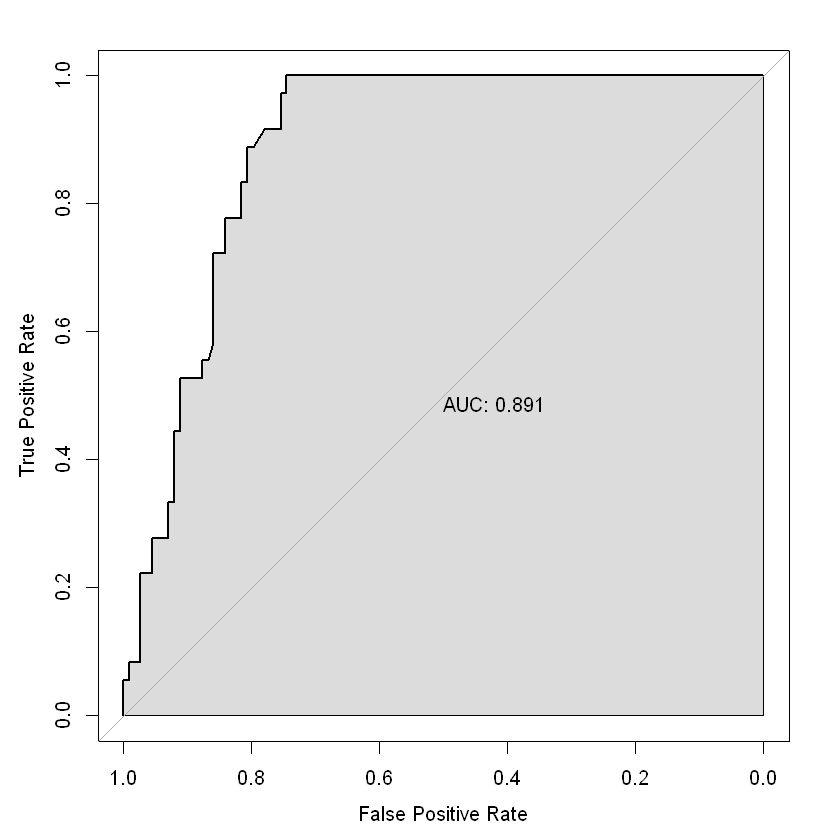

In [13]:

confusionMatrix(ptest$predictions,testnorm$Class)
roccurve<-roc(testnorm$Class~ptest$decisionValues[,1])
plot(roccurve,colorize=TRUE,xlab="False Positive Rate",ylab="True Positive Rate",auc.polygon = TRUE,print.auc=TRUE)

In [69]:
alldata= read.csv("transfusion.data")

colnames(alldata) <-c("R","F","M","T","Class")

salldata<-scale(alldata[,1:4],center=TRUE,scale=TRUE)
alldatanorm=cbind(salldata,alldata$Class)
colnames(alldatanorm) <-c("R","F","M","T","Class")
alldatanorm=as.data.frame(alldatanorm)
alldatanorm$Class=as.factor(alldatanorm$Class)
ones=which(alldatanorm$Class==1)
zeros=which(alldatanorm$Class==0)

newclassone<-alldatanorm[ones,]
newclasszero<-alldatanorm[zeros,]

# ones=which(alldata$Class==1)
# zeros=which(alldata$Class==0)

# newclassone<-alldata[ones,]
# newclasszero<-alldata[zeros,]



zeroind=ceiling(1/5*nrow(newclasszero))
oneind=ceiling(1/5*nrow(newclassone))

testnorm = rbind(newclasszero[1:zeroind,],newclassone[1:oneind,])
trainnorm=rbind(newclasszero[(zeroind+1):nrow(newclasszero),],newclassone[(oneind+1):nrow(newclassone),])
rownames(testnorm) <- seq(length=nrow(testnorm))
rownames(trainnorm) <- seq(length=nrow(trainnorm))
# nolabeltrain = trainnorm[,1:4]
# nolabeltest = testnorm[,1:4]
# trainlabel=trainnorm[,5]
# testlabel=testnorm[,5]

In [70]:
head(testnorm)

R,F,M,T,Class
-1.0508053,3.1656657,3.1656657,1.75240657,0
-0.6802243,-0.2593982,-0.2593982,-1.24225460,0
-1.0508053,1.1106273,1.1106273,0.02945083,0
-0.6802243,2.9944125,2.9944125,0.97297421,0
-1.1743323,-0.4306514,-0.4306514,-1.24225460,0
-1.0508053,1.2818805,1.2818805,0.52172390,0


In [71]:
#run multiple times
#use multiple random assignment to avoid local optimal
for (i in 1:10){
    km.out=kmeans(trainnorm[,1:4],2, nstart = i * 2)
    print(km.out)
}

K-means clustering with 2 clusters of sizes 469, 129

Cluster means:
             R          F          M          T
1  0.256368577 -0.4343029 -0.4343029 -0.2857859
2 -0.006092371  1.1531087  1.1531087  1.2496393

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  2   1   2   1   1   1   2   1   2   2   2   1   1   2   1   1   1   1   1   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1   1   1   2 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  2   1   1   2   2   1   1   1   2   2   1   1   1   1   2   1   1   1   1   2 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  2   1   2   1   1   1   1   1   2   1   2   2   2   1   1   1   1   1   2   1 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  1   1   1   1   1   1   1   1   1   

In [72]:
km.out=kmeans(trainnorm[,1:4],2,nstart = 20)

In [73]:
centers = km.out$centers

In [74]:
centers

,R,F,M,T
1,0.2885026,-0.4699880,-0.4699880,-0.3992417
2,-0.0293035,0.8839989,0.8839989,1.1930724


In [75]:
trainnorm$dist1 = apply(trainnorm,1,function(x) sqrt(sum((as.numeric(x[1:4])-centers[1])^2)))
trainnorm$dist2 = apply(trainnorm,1,function(x) sqrt(sum((as.numeric(x[1:4])-centers[2])^2)))


In [76]:
trainnormd1=trainnorm
trainnormd2=trainnorm
deter1 = data.frame()
deter2=data.frame()
for (i in 1:30){
    tmpmin =which(trainnormd1$dist1==(min(trainnormd1$dist1)))
    if (length(tmpmin)>=1){
        tmpmin = tmpmin[1]
    }
#     print(tmpmin)
    deter1=rbind(deter1,trainnormd1[tmpmin,])
    trainnormd1=trainnormd1[-tmpmin,]
}
for (i in 1:30){
    tmpmin =which(trainnormd2$dist2==(min(trainnormd2$dist2)))
    if (length(tmpmin)>=1){
        tmpmin = tmpmin[1]
    }
#     print(tmpmin)
    deter2=rbind(deter2,trainnormd2[tmpmin,])
    trainnormd2=trainnormd2[-tmpmin,]
}


In [77]:
print(length(which(deter1$Class==0)))
print(length(which(deter2$Class==0)))
#so we have to mark both cluster as 0

[1] 25
[1] 24


In [99]:
ptrain = cl_predict(km.out,trainnorm[,1:4])
for (i in 1:length(ptrain)){
    ptrain[i]=0
}



confusionMatrix(ptrain,trainnorm$Class)

Warning message in confusionMatrix.default(ptrain, trainnorm$Class):
"Levels are not in the same order for reference and data. Refactoring data to match."

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 456 142
         1   0   0
                                          
               Accuracy : 0.7625          
                 95% CI : (0.7264, 0.7961)
    No Information Rate : 0.7625          
    P-Value [Acc > NIR] : 0.5225          
                                          
                  Kappa : 0               
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.7625          
         Neg Pred Value :    NaN          
             Prevalence : 0.7625          
         Detection Rate : 0.7625          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 0               
                                          

In [98]:
ptest=cl_predict(km.out, testnorm[,1:4])

for (i in 1:length(ptest)){
    ptest[i]=0
}



confusionMatrix(ptest,testnorm$Class)

Warning message in confusionMatrix.default(ptest, testnorm$Class):
"Levels are not in the same order for reference and data. Refactoring data to match."

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 114  36
         1   0   0
                                          
               Accuracy : 0.76            
                 95% CI : (0.6835, 0.8259)
    No Information Rate : 0.76            
    P-Value [Acc > NIR] : 0.5446          
                                          
                  Kappa : 0               
 Mcnemar's Test P-Value : 5.433e-09       
                                          
            Sensitivity : 1.00            
            Specificity : 0.00            
         Pos Pred Value : 0.76            
         Neg Pred Value :  NaN            
             Prevalence : 0.76            
         Detection Rate : 0.76            
   Detection Prevalence : 1.00            
      Balanced Accuracy : 0.50            
                                          
       'Positive' Class : 0               
                                          